In [6]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [3]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [4]:
os.chdir("/mnt/lanlep2019/")

In [5]:
!pwd

/mnt/lanlep2019


# do once

In [7]:
!mkdir -p input/feat

In [8]:
!cd input/feat && tar xf /mnt/lizhen-east2/notebook/fastseq/6/tmp.tar 

In [32]:
! cd /mnt/ && git clone https://github.com/scikit-learn-contrib/boruta_py.git

Cloning into 'boruta_py'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 284 (delta 8), reused 16 (delta 7), pack-reused 267
Receiving objects: 100% (284/284), 146.78 KiB | 6.67 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [33]:
!cd /mnt/boruta_py/ && python setup.py install

running install
running bdist_egg
running egg_info
creating Boruta.egg-info
writing requirements to Boruta.egg-info/requires.txt
writing Boruta.egg-info/PKG-INFO
writing top-level names to Boruta.egg-info/top_level.txt
writing dependency_links to Boruta.egg-info/dependency_links.txt
writing manifest file 'Boruta.egg-info/SOURCES.txt'
reading manifest file 'Boruta.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'Boruta.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/boruta
copying boruta/__init__.py -> build/lib/boruta
copying boruta/boruta_py.py -> build/lib/boruta
creating build/lib/boruta/examples
copying boruta/examples/test_X.csv -> build/lib/boruta/examples
copying boruta/examples/test_y.csv -> build/lib/boruta/examples
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg

# load data

In [7]:
import data
import config

In [8]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

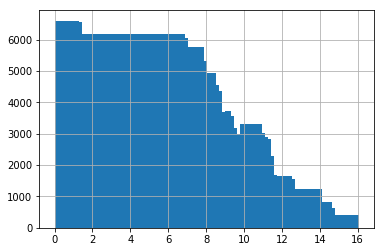

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [14]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [15]:
datadf.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 417740 entries, quake_03_0200_105000 to quake_11_0071_030000
Columns: 450 entries, mean to fwvext_wholereg
dtypes: float32(448), float64(2)
memory usage: 723.5+ MB


In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


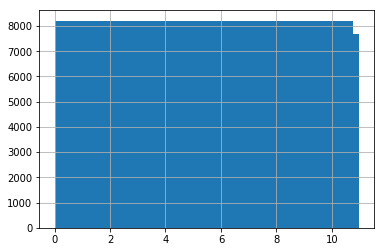

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import lightgbm as lgb

/home/hadoop/miniconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = datadf.values
y = ydf.values


In [122]:
class LGBWrapper:
    def __init__(self, n_estimators = 1000, n_jobs = -1, max_depth=6):
        self.n_estimators=n_estimators
        self.n_jobs=n_jobs
        self.max_depth=max_depth
        self.reg=lgb.LGBMRegressor(n_estimators = n_estimators, n_jobs = n_jobs, max_depth=max_depth)
    def get_params(self):
        return self.reg.get_params()
    def set_params(self, **params):  
        if  'random_state' in params:
            a={'seed':params['random_state'].randint(1)}
            self.set_params(**a)
            
            newparams=dict(params)
            del newparams['random_state']
            self.set_params(**newparams)
        else:
            self.reg.set_params(**params)
    def fit(self,X,y):
        self.reg.fit(X,y)
        return self
    @property
    def feature_importances_(self):
        return self.reg.feature_importances_

In [123]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
#rf = RandomForestRegressor(n_jobs=n_thread,  max_depth=6)

rf = LGBWrapper(n_estimators = 2000, n_jobs = n_thread, max_depth=6)


In [124]:


# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)


In [125]:
%%time 
# find all relevant features - 5 features should be selected
feat_selector.fit(X[:,:], y)


Iteration: 	96 / 100
Confirmed: 	395
Tentative: 	18
Rejected: 	37
Iteration: 	97 / 100
Confirmed: 	395
Tentative: 	18
Rejected: 	37
Iteration: 	98 / 100
Confirmed: 	395
Tentative: 	18
Rejected: 	37
Iteration: 	99 / 100
Confirmed: 	395
Tentative: 	18
Rejected: 	37


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	395
Tentative: 	1
Rejected: 	37
CPU times: user 1d 10h 13min 17s, sys: 19min 57s, total: 1d 10h 33min 14s
Wall time: 1h 14min 39s


BorutaPy(alpha=0.05,
     estimator=<__main__.LGBWrapper instance at 0x7f3897f13d88>,
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7f3890ea8690>,
     two_step=True, verbose=2)

In [126]:

# check selected features - first 5 features are selected
print feat_selector.support_

# check ranking of features
print feat_selector.ranking_

# call transform() on X to filter it down to selected features
#X_filtered = feat_selector.transform(X)


[ True  True  True  True False  True  True False  True  True False  True
  True  True False False  True  True False False  True  True  True  True
  True  True  True  True  True False  True False  True False  True False
  True False False  True  True  True  True  True  True  True False False
 False  True  True  True False  True  True  True False False False False
 False  True  True False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True False False  True
  True  True  True  True  True False False False  True False False  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True False  True  True False False  True  True  True
  True  True  True False  True False False  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False False
 False False  True False False  True  True  True Fa

In [127]:
feat_selector.support_weak_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [130]:
print feat_selector.support_.sum()
print feat_selector.support_weak_.sum()
print feat_selector.n_features_

395
1
395


In [145]:
datadf.columns[~feat_selector.support_]

Index([u'mean_change_abs', u'abs_min', u'std_first_10000', u'avg_first_10000',
       u'avg_last_10000', u'min_first_10000', u'min_last_10000',
       u'mean_change_rate_first_10000', u'q95', u'q05', u'abs_q95', u'abs_q05',
       u'abs_q01', u'med', u'Hilbert_mean', u'Hann_window_mean',
       u'classic_sta_lta4_mean', u'classic_sta_lta8_mean',
       u'exp_Moving_average_300_mean', u'exp_Moving_average_3000_mean',
       u'exp_Moving_average_30000_mean', u'MA_700MA_std_mean',
       u'MA_400MA_std_mean', u'MA_400MA_BB_high_mean', u'MA_1000MA_std_mean',
       u'av_change_abs_roll_std_10', u'abs_max_roll_std_10',
       u'ave_roll_mean_10', u'q99_roll_mean_10', u'av_change_abs_roll_mean_10',
       u'av_change_rate_roll_mean_10', u'ave_roll_std_100',
       u'std_roll_std_100', u'abs_max_roll_std_100', u'ave_roll_mean_100',
       u'av_change_abs_roll_mean_100', u'ave_roll_std_1000',
       u'std_roll_std_1000', u'av_change_abs_roll_std_1000',
       u'abs_max_roll_std_1000', u'ave_ro

In [144]:
feat_selector.support_

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,

In [148]:
str(list(feat_selector.support_))

'[True, True, True, True, False, True, True, False, True, True, False, True, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, True, True, True, False, True, True, True, False, False, False, False, False, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, False, False, False, True, False, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, Tr

In [139]:
newdatadf=datadf.iloc[:, feat_selector.support_]
newdatadf.shape

(409394, 395)

In [140]:
best_mae=11111
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=newdatadf[tridx],ydf[tridx],newdatadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

def lgbcv(num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return -r

In [141]:
a={'colsample_bytree': 0.32176730266041453,
  'max_depth': 3.2942386945456024,
  'min_data_in_leaf': 1519.3431788315413,
  'min_sum_hessian_in_leaf': 0.4299396260267727,
  'num_leaves': 127.33810239137438,
  'reg_alpha': 2.7531147838832046,
  'reg_lambda': 0.0849284894571881,
  'subsample': 0.622213391736061}

In [142]:
lgbcv(**a)

valid quake 1
(379874, 395) (379874,) (29520, 395) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07778	valid_1's l1: 1.25222
[200]	training's l1: 1.02615	valid_1's l1: 1.23101
[300]	training's l1: 0.992257	valid_1's l1: 1.23112
Early stopping, best iteration is:
[285]	training's l1: 0.997729	valid_1's l1: 1.22872
quake  1 (1.2287219984574544, 285)
valid quake 2
(373099, 395) (373099,) (36295, 395) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06751	valid_1's l1: 1.3291
[200]	training's l1: 1.01714	valid_1's l1: 1.32572
Early stopping, best iteration is:
[163]	training's l1: 1.03331	valid_1's l1: 1.32264
quake  2 (1.3226358478950986, 163)
valid quake 3
(386763, 395) (386763,) (22631, 395) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09878	valid_1's l1: 0.884476
[200]	training's l1: 1.0503	valid_1's l1: 0.865526
Early stopping, best iteration

-1.149702779511002